# RQ2 Competitive Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# from datetime import datetime, timedelta, date
import datetime
import time
import seaborn as sns
plt.style.use('ggplot')
import matplotlib.dates as mdates
pd.plotting.register_matplotlib_converters()

In [3]:
poke_data = pd.read_csv('pokemon_data.csv',index_col=0)
poke_data_meta = pd.read_csv('metadata.csv',index_col=0)

pikalytics = pd.read_csv('pikalytics.csv',index_col=0)

In [4]:
poke_data.head(10)

,file_index,pokemon,usage_perc,raw,perc,real2,perc2
0,0,Kyogre,0.291667,7.0,0.29167,5.0,0.25
1,0,Palkia,0.250000,6.0,0.25000,5.0,0.25
2,0,Zekrom,0.250000,6.0,0.25000,5.0,0.25
3,0,Arceus,0.208333,5.0,0.20833,3.0,0.15
4,0,Rayquaza,0.208333,5.0,0.20833,5.0,0.25
5,0,Reshiram,0.208333,5.0,0.20833,5.0,0.25
6,0,Excadrill,0.208333,5.0,0.20833,4.0,0.20
7,0,Groudon,0.208333,5.0,0.20833,5.0,0.25
8,0,Darkrai,0.208333,5.0,0.20833,5.0,0.25
9,0,Giratina,0.166667,4.0,0.16667,3.0,0.15


In [5]:
poke_data_meta.loc[0,'txt_file']

'https://www.smogon.com/stats/2014-11/gen5ubers-0.txt'

In [6]:
pikalytics.loc[0,'url']

'https://www.pikalytics.com/pokedex/ss/Incineroar?l=en'

In [7]:
# Remove row with non available stats section (only one)
pikalytics = pikalytics[~pikalytics['stats'].isna()]
pikalytics.loc[:,'section'] = pikalytics.loc[:,'section'].apply(lambda x: x.replace('(0+)','').strip())
pikalytics

,section,poke_name,perc_use,url,stats,moves,items,types,abilities
0,Showdown VGC 2021,Incineroar,0.3889,https://www.pikalytics.com/pokedex/ss/Incinero...,HP:95;Atk:115;Def:90;SpA:80;SpD:90;Spe:60;,Fake Out:99.747%;Flare Blitz:98.762%;Parting S...,Assault Vest:27.917%;Sitrus Berry:25.373%;Safe...,fire;dark,Intimidate:99.916%;Blaze:0.084%;
1,Showdown VGC 2021,Regieleki,0.2367,https://www.pikalytics.com/pokedex/ss/Regielek...,HP:80;Atk:100;Def:50;SpA:100;SpD:50;Spe:200;,Electroweb:92.707%;Protect:81.070%;Volt Switch...,Focus Sash:41.088%;Magnet:25.573%;Life Orb:16....,electric,Transistor:100.000%;
2,Showdown VGC 2021,Landorus-Therian,0.1852,https://www.pikalytics.com/pokedex/ss/Landorus...,HP:89;Atk:145;Def:90;SpA:105;SpD:80;Spe:91;,Earthquake:98.754%;Fly:92.680%;Rock Slide:87.1...,Lum Berry:28.498%;Assault Vest:27.663%;Life Or...,ground;flying,Intimidate:100.000%;
3,Showdown VGC 2021,Thundurus,0.1844,https://www.pikalytics.com/pokedex/ss/Thunduru...,HP:79;Atk:115;Def:70;SpA:125;SpD:80;Spe:111;,Fly:82.810%;Wild Charge:81.839%;Superpower:74....,Assault Vest:59.556%;Life Orb:14.886%;Safety G...,electric;flying,Defiant:80.858%;Prankster:19.142%;
4,Showdown VGC 2021,Zacian-Crowned,0.1791,https://www.pikalytics.com/pokedex/ss/Zacian-C...,HP:92;Atk:170;Def:115;SpA:80;SpD:115;Spe:148;,Behemoth Blade:99.999%;Protect:99.350%;Substit...,Rusted Sword:100.000%;,fairy;steel,Intrepid Sword:100.000%;
...,...,...,...,...,...,...,...,...,...
215,Gen 7 OverUsed,Gliscor,0.0932,https://www.pikalytics.com/pokedex/ou/Gliscor?...,HP:75;Atk:95;Def:125;SpA:45;SpD:75;Spe:95;,Earthquake:97.525%;Roost:79.257%;Defog:45.062%...,Toxic Orb:98.959%;Other:1.041%;,ground;flying,Poison Heal:99.604%;Hyper Cutter:0.346%;Sand V...
216,Gen 7 OverUsed,Greninja,0.0919,https://www.pikalytics.com/pokedex/ou/Greninja...,HP:72;Atk:95;Def:67;SpA:103;SpD:71;Spe:122;,Ice Beam:90.771%;Gunk Shot:62.586%;U-turn:50.7...,Choice Scarf:40.075%;Life Orb:16.470%;Expert B...,water;dark,Protean:99.585%;Torrent:0.415%;
217,Gen 7 OverUsed,Mawile-Mega,0.0917,https://www.pikalytics.com/pokedex/ou/Mawile-M...,HP:50;Atk:105;Def:125;SpA:55;SpD:95;Spe:50;,Play Rough:93.526%;Sucker Punch:86.664%;Swords...,Mawilite:100.000%;,steel;fairy,Huge Power:100.000%;
218,Gen 7 OverUsed,Hawlucha,0.0913,https://www.pikalytics.com/pokedex/ou/Hawlucha...,HP:78;Atk:92;Def:75;SpA:74;SpD:63;Spe:118;,Acrobatics:99.820%;Swords Dance:97.818%;High J...,Electric Seed:69.486%;Psychic Seed:23.401%;Mis...,fighting;flying,Unburden:99.474%;Limber:0.348%;Mold Breaker:0....


In the next section, we split the stats into different columns. The stats were stored in the following format: **HP:108;Atk:130;Def:95;SpA:80;SpD:85;Spe:102** for simplicity sake.

In [8]:
def split_stats(row):
    stats = row['stats'][:-1]
    for stat in stats.split(';'):
        key, val = stat.split(':')
        row[key] = int(val)
    return row

pikalytics = pikalytics.apply(split_stats,axis=1)

In [9]:
tiers = pikalytics.section.unique()
ordered_tiers = ['Showdown VGC 2021','VGC 2019 Ultra Series','VGC 2018',
                'VGC 2017', 'Ubers','Gen 7 OverUsed','OverUsed', 'UnderUsed','RarelyUsed',
                'NeverUsed','PU']

The stats are then aggregated by tier and averaged. This means we took the average of each of the tier's stats (HP, Atk, Def, SpA, SpD, Spe)

In [10]:
group_stats = pikalytics.groupby('section').agg({'HP':'mean','Atk':'mean','Def':'mean',
                                   'SpA':'mean','SpD':'mean','Spe':'mean'})
group_stats.reset_index(inplace=True)
group_stats_melted = pd.melt(group_stats,id_vars='section', var_name="stat", value_name="value")
# print(group_stats)
group_stats_melted

,section,stat,value
0,Gen 7 OverUsed,HP,84.350000
1,NeverUsed,HP,84.578947
2,OverUsed,HP,87.150000
3,PU,HP,82.450000
4,RarelyUsed,HP,85.800000
...,...,...,...
61,Ubers,Spe,94.900000
62,UnderUsed,Spe,76.300000
63,VGC 2017,Spe,84.300000
64,VGC 2018,Spe,89.100000


We split the information in two graphs, in order to have better looking graph. Otherwise, the information is very clustered.
<br>Information is ordered based on the *ordered_list* values. 
<br><br>Here we can see that for VGC from 2017 to 2019, the stats of HP, Atk and Def have increased each year, while they all decreased in 2021. If we look at the next graph, which looks at SpA, SpD and Spe, we see the same trend from 2017 to 2019, where values increase for VGC. In 2021, the values again decrease.

<br>

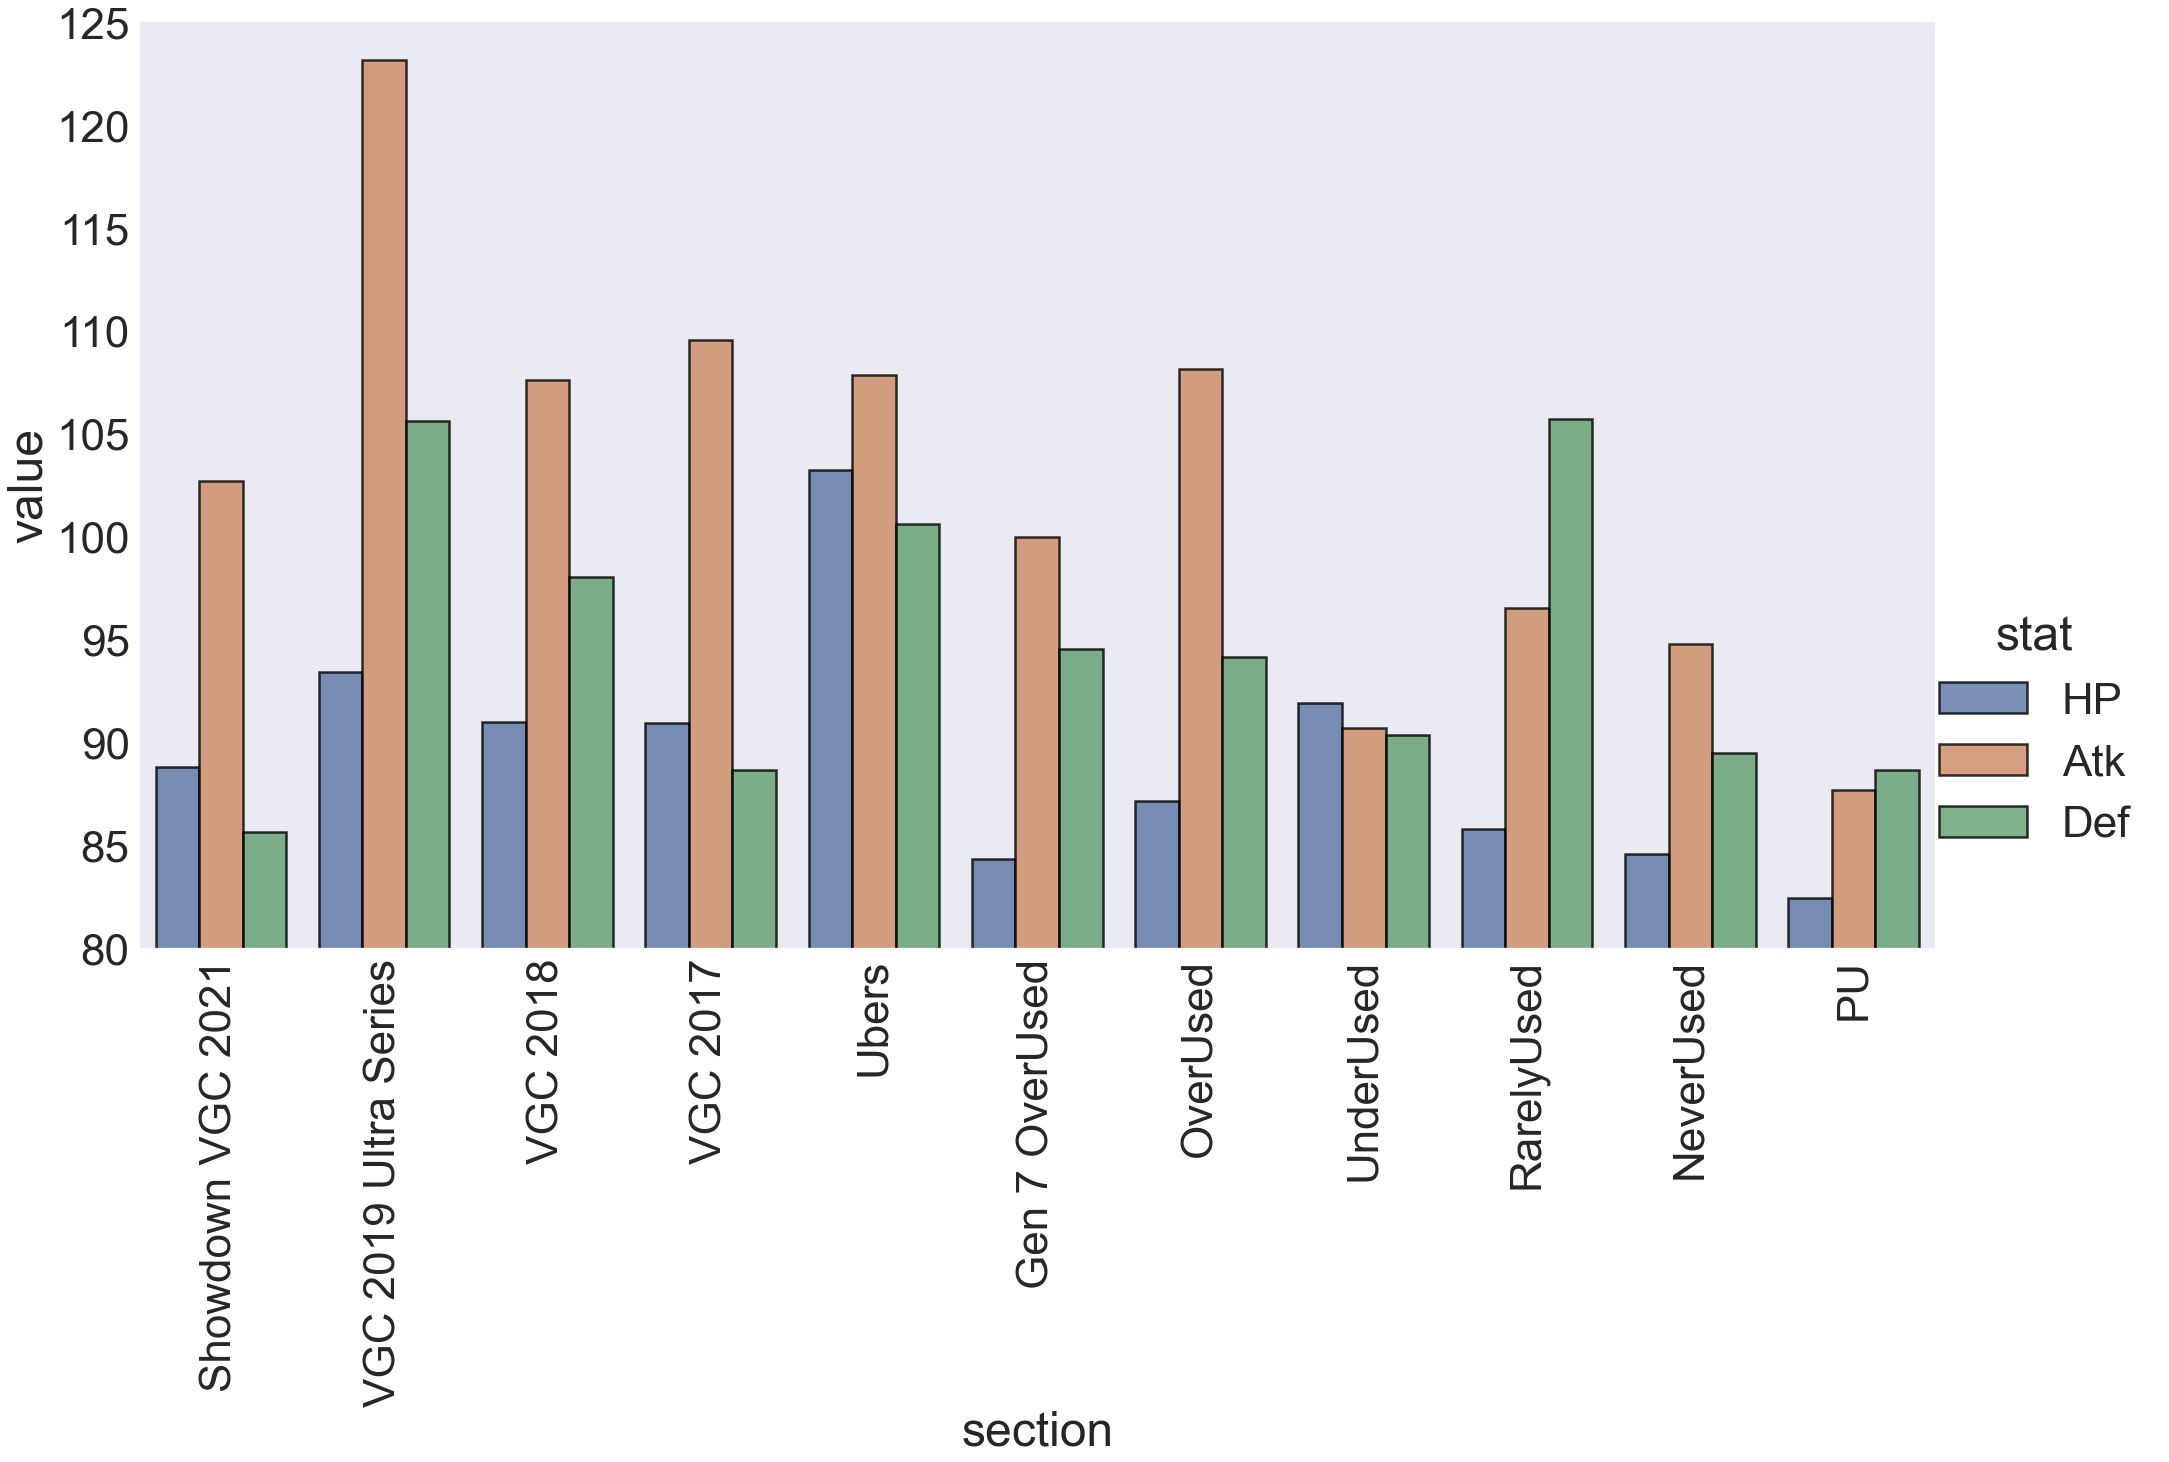

In [11]:
sns.set(font_scale=4)
sns.set_style({'axes.grid' : False})

# Hp Attack def stats
hpAtkDef = ['HP','Atk','Def']
fig = sns.catplot(x='section', y='value', hue='stat',
               data=group_stats_melted[group_stats_melted['stat'].isin(hpAtkDef)],
               kind='bar', height=15, aspect=15/8,order=ordered_tiers,alpha=0.8,
           edgecolor='black',linewidth=2.5)

fig.set_xticklabels(rotation=90)
fig.set(ylim=(80,125))

plt.show()

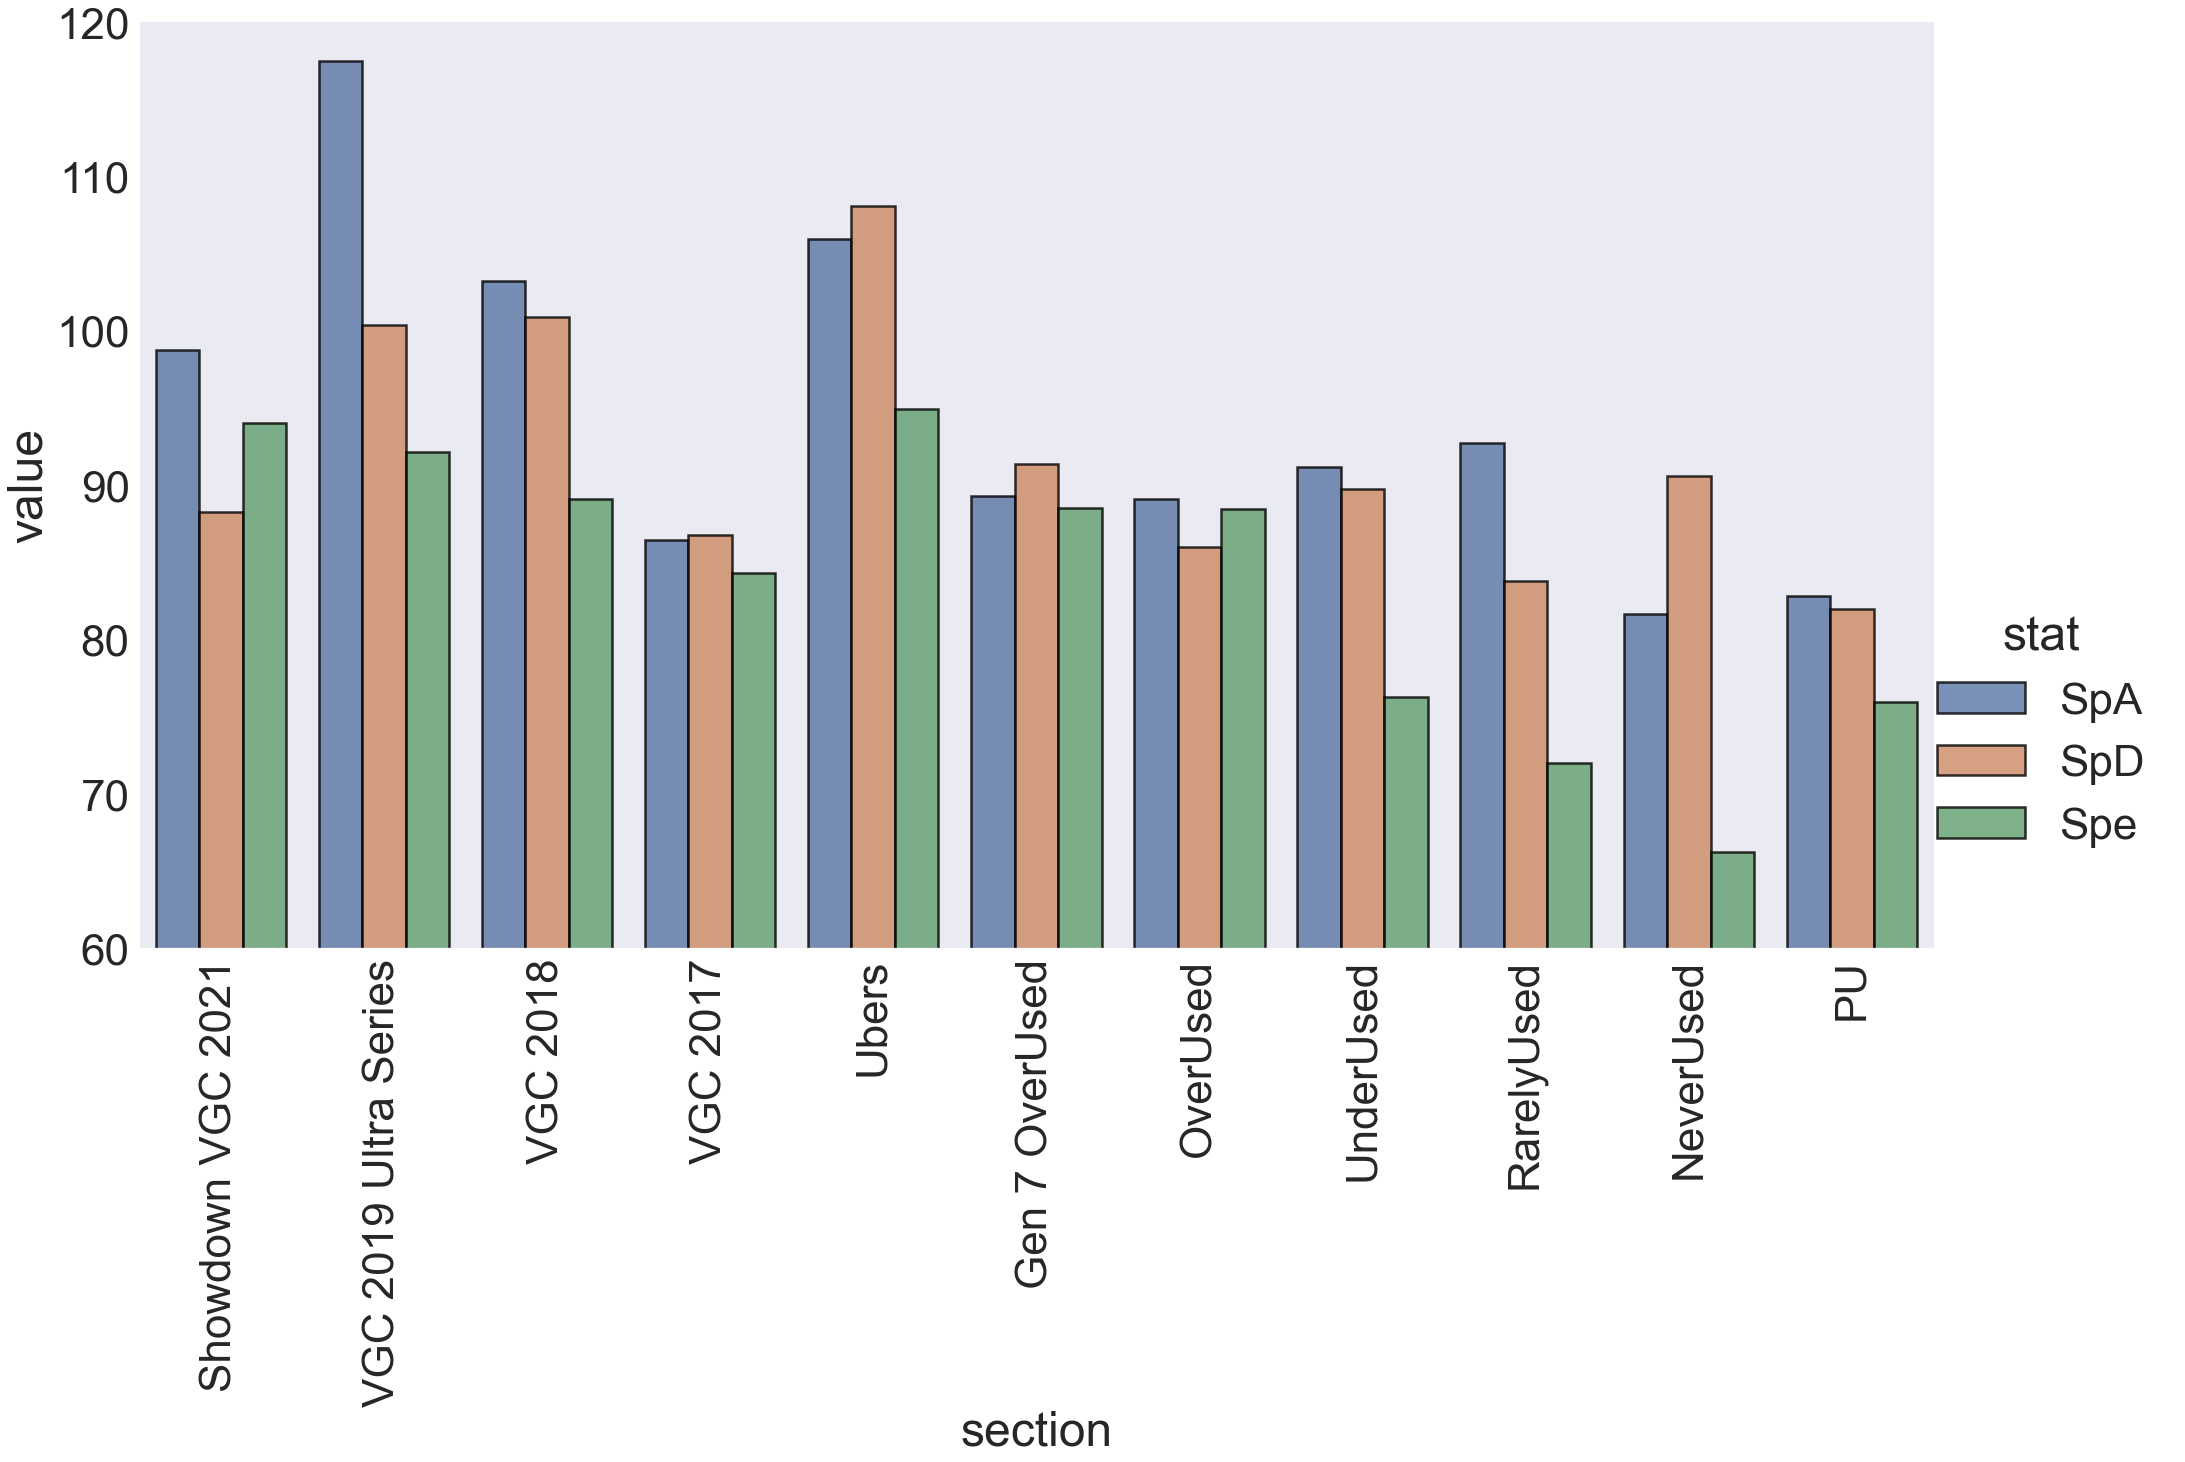

In [12]:
fig = sns.catplot(x='section', y='value', hue='stat',
               data=group_stats_melted[~group_stats_melted['stat'].isin(hpAtkDef)],
               kind='bar', height=15, aspect=15/8,order=ordered_tiers,alpha=0.8,
           edgecolor='black',linewidth=2.5)

fig.set_xticklabels(rotation=90)
fig.set(ylim=(60,120))
plt.show()

## Analysis of different types
Transform type of form **typeA;typeB** to one column for each type available. Also fill N\A with 0 for splitted types

In [13]:
def split_types(row):
    types = row['types']
    for type_ in types.split(';'):
        row[type_] = 1
    return row

pikalytics = pikalytics.apply(split_types,axis=1)
pikalytics.fillna(0, inplace=True)

In [14]:
types = ['bug', 'dark','dragon', 'electric', 'fairy', 'fighting', 'fire',
        'flying', 'ghost', 'grass', 'ground', 'ice', 'normal',
       'poison', 'psychic', 'rock', 'steel', 'water']

Calculate popularity of each type. This is done by doing a weighted average by the % use of each pokemon.

In [15]:
use_dict = {key:0 for key in types}
for type_ in types:
    # Find rows which have this type
    type_df = pikalytics[pikalytics[type_]==1].copy()['perc_use']
    for perc_use in type_df:
        use_dict[type_] += perc_use

denom_avg = pikalytics['perc_use'].sum()
for type_ in types:
    use_dict[type_] /= denom_avg
    

The following number of defensive strenghts and weaknesses are entered manually. Defensive_weak are calculated as the number of values < 1 in each of the columns and defensive_str as the number of values > 1 in each of the columns

In [30]:
type_df = pd.DataFrame(list(use_dict.values()), columns=['relative_perc'], index=list(use_dict.keys()))
type_df['defensive_str'] = [3,3,4,3,4,3,6,4,4,4,3,1,1,5,2,4,11,4]
type_df['defensive_weak'] = [3,3,3,1, 2,3,3,3,2,5,3,4,1,2,3,5,3,2]
type_df['offensive_weak'] = [7,3,2,4,3,6,4,3,2,7,3,4,3,5,3,3,4,3]
type_df['offensive_str'] =  [3,2,1,2,3,5,4,3,2,3,5,4,0,2,2,4,3,3]
type_df

,relative_perc,defensive_str,defensive_weak,offensive_weak,offensive_str
bug,0.031103,3,3,7,3
dark,0.106626,3,3,3,2
dragon,0.091404,4,3,2,1
electric,0.110141,3,1,4,2
fairy,0.178104,4,2,3,3
fighting,0.043677,3,3,6,5
fire,0.127520,6,3,4,4
flying,0.172413,4,3,3,3
ghost,0.054565,4,2,2,2
grass,0.107833,4,5,7,3


To better show the information, we can limit the number of types to show in the graph.

In [56]:
show_n = 25
type_df.sort_values('relative_perc',ascending=False, inplace=True)
type_df_temp = type_df.copy().iloc[:show_n]
type_df_temp

,relative_perc,defensive_str,defensive_weak,offensive_weak,offensive_str,Atk,Def,HP,SpA,SpD,Spe
fairy,0.178104,4,2,3,3,93.857143,93.171429,77.828571,99.914286,100.085714,89.714286
steel,0.174160,11,3,4,3,118.846154,119.538462,77.615385,75.025641,85.128205,73.179487
flying,0.172413,4,3,3,3,114.117647,89.441176,92.264706,106.088235,87.382353,97.764706
fire,0.127520,6,3,4,4,95.882353,94.117647,83.588235,110.470588,93.941176,84.764706
water,0.122454,4,2,3,3,87.645161,98.032258,88.870968,97.354839,105.516129,71.580645
ground,0.117324,3,3,3,5,123.347826,103.000000,96.086957,82.304348,77.913043,79.260870
psychic,0.116458,2,3,3,2,99.115385,99.269231,86.538462,116.230769,106.807692,83.000000
electric,0.110141,3,1,4,2,94.730769,78.192308,75.807692,105.538462,80.115385,114.000000
grass,0.107833,4,5,7,3,115.041667,101.750000,80.625000,75.500000,77.750000,76.166667
dark,0.106626,3,3,3,2,122.000000,93.062500,94.750000,89.125000,85.812500,83.312500


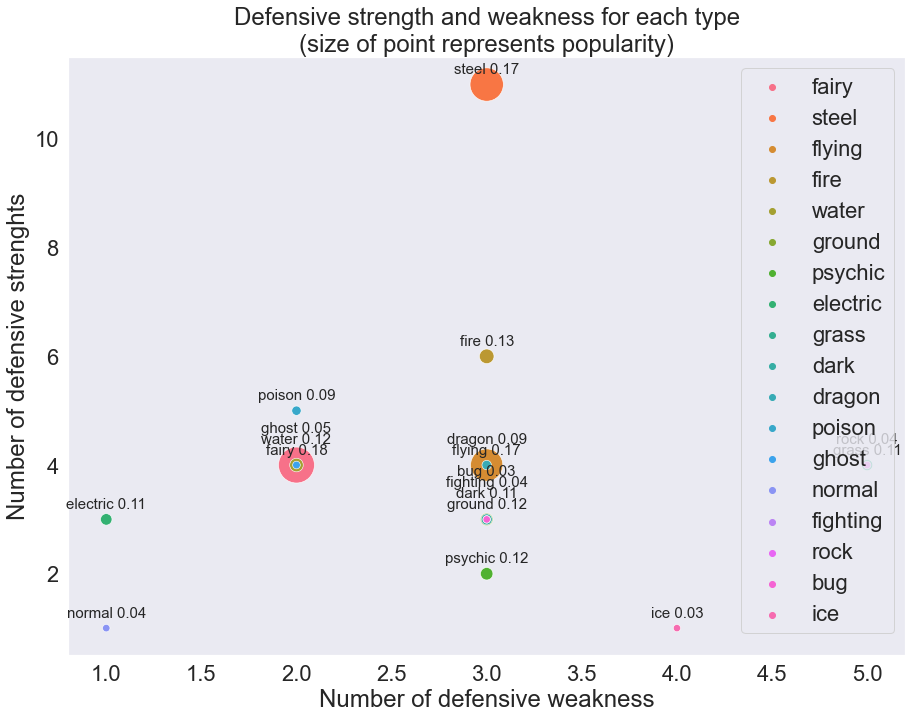

In [62]:
sns.set(font_scale=2)
sns.set_style({'axes.grid' : False})

fig = plt.gcf()
fig.set_size_inches(15, 11)
sns.scatterplot(data=type_df_temp, x='defensive_weak', y='defensive_str',
                 hue=type_df_temp.index,s=np.exp(type_df_temp['relative_perc']*40)+50)
plt.title("Defensive strength and weakness for each type\n(size of point represents popularity)")
# plt.xlim([0,11.5])
# plt.ylim([0,5])
plt.xlabel("Number of defensive weakness")
plt.ylabel("Number of defensive strenghts")

rows_done = []
for _, row in type_df_temp.iterrows():
    weak,stre,type_name, prob = row['defensive_weak'], row['defensive_str'], row.name, row['relative_perc']
    # One console for given year
    filt_df = type_df_temp.copy().loc[(type_df_temp['defensive_weak']==weak)&(type_df_temp['defensive_str']==stre)]
    if len(filt_df.index) == 1: 
        plt.text(weak,stre+0.2,f'{type_name} {round(prob,2)}', ha='center', fontsize=15) #, rotation = 90
    else:
        idv = 1
        for _, row2 in filt_df.iterrows():
            type_name, prob = row2.name, row2['relative_perc']
            if type_name not in rows_done:
                rows_done.append(type_name)
                plt.text(weak,stre+(0.2*idv),f'{type_name} {round(prob,2)}', ha='center', fontsize=15) #, rotation = 90
            idv+=1 


plt.show()

The following number of offensive strenghts and weaknesses are entered manually. Offensive_weak are calculated as the number of values < 1 in each of the rows and offensive_str as the number of values > 1 in each of the rows

In [33]:
type_df

,relative_perc,defensive_str,defensive_weak,offensive_weak,offensive_str
fairy,0.178104,4,2,3,3
steel,0.174160,11,3,4,3
flying,0.172413,4,3,3,3
fire,0.127520,6,3,4,4
water,0.122454,4,2,3,3
ground,0.117324,3,3,3,5
psychic,0.116458,2,3,3,2
electric,0.110141,3,1,4,2
grass,0.107833,4,5,7,3
dark,0.106626,3,3,3,2


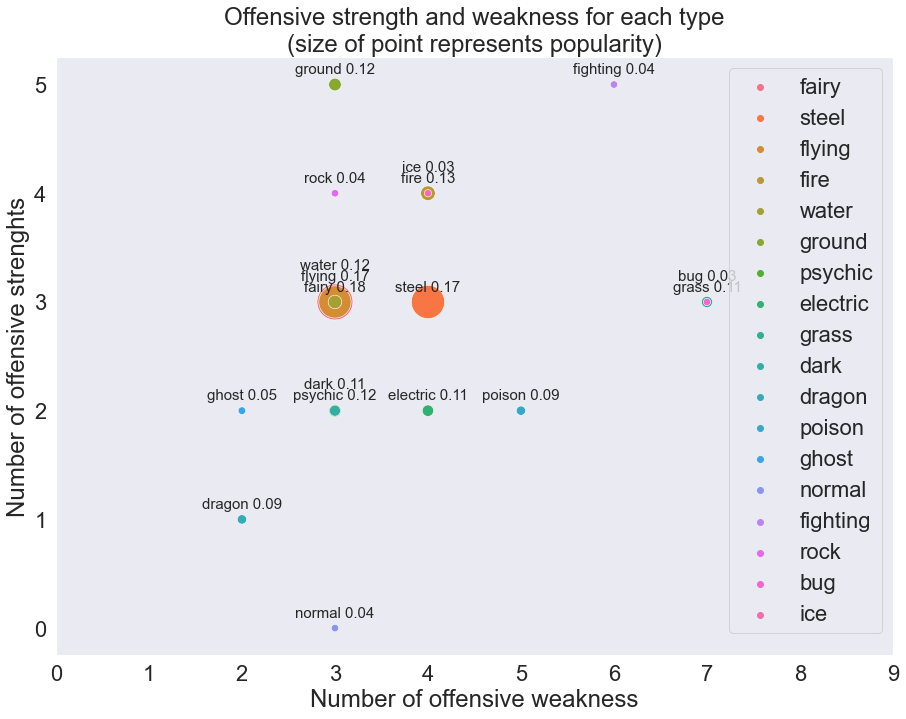

In [61]:
sns.set(font_scale=2)
sns.set_style({'axes.grid' : False})

fig = plt.gcf()
fig.set_size_inches(15, 11)
sns.scatterplot(data=type_df_temp, x='offensive_weak', y='offensive_str',
                 hue=type_df_temp.index,s=np.exp(type_df_temp['relative_perc']*40)+50)
plt.title("Offensive strength and weakness for each type\n(size of point represents popularity)")
plt.xlim([0,9])
plt.xlabel("Number of offensive weakness")
plt.ylabel("Number of offensive strenghts")

rows_done = []
for _, row in type_df_temp.iterrows():
    weak,stre,type_name, prob = row['offensive_weak'], row['offensive_str'], row.name, row['relative_perc']
    # One console for given year
    filt_df = type_df_temp.copy().loc[(type_df['offensive_weak']==weak)&(type_df['offensive_str']==stre)]
    if len(filt_df.index) == 1: 
        plt.text(weak,stre+0.1,f'{type_name} {round(prob,2)}', ha='center', fontsize=15) #, rotation = 90
    else:
        idv = 1
        for _, row2 in filt_df.iterrows():
            type_name, prob = row2.name, row2['relative_perc']
            if type_name not in rows_done:
                rows_done.append(type_name)
                plt.text(weak,stre+(0.1*idv),f'{type_name} {round(prob,2)}', ha='center', fontsize=15) #, rotation = 90
            idv+=1 


plt.show()

Looking at the previous two graphs, we can see that the most popular types are quite balanced in terms of offensive and defensive strenghts and weaknesses. We can see that by looking at the larger circles, which are in the middle of the graph.
<br>There is one notable exception, is **steel**, which has 11 defensive weaknesses and only 3 defensive strenghts, while being the second most popular type. In the following section, we will see which combination types are the most popular.
<br><br>We do the same preprocessing as before, but with full types.

In [35]:
def split_types(row):
    types = row['types']
    row[types] = 1
    return row

temp_df_types = pikalytics.copy().apply(split_types,axis=1)

temp_df_types.fillna(0, inplace=True)

In [36]:
use_dict_full = {key:0 for key in pikalytics.types.unique()}
for type_ in pikalytics.types.unique():
    # Find rows which have this type
    perc_df = temp_df_types[temp_df_types[type_]==1].copy()['perc_use']
    for perc_use in perc_df:
        use_dict_full[type_] += perc_use

denom_avg = pikalytics['perc_use'].sum()
for type_ in pikalytics.types.unique():
    use_dict_full[type_] /= denom_avg
    

In [37]:
type_df_combined = pd.DataFrame(list(use_dict_full.values()), columns=['relative_perc'], index=list(use_dict_full.keys()))
type_df_combined.sort_values('relative_perc',ascending=False, inplace=True)
type_df_combined.head()

,relative_perc
fairy,0.178104
steel,0.174160
flying,0.172413
fire,0.127520
water,0.122454


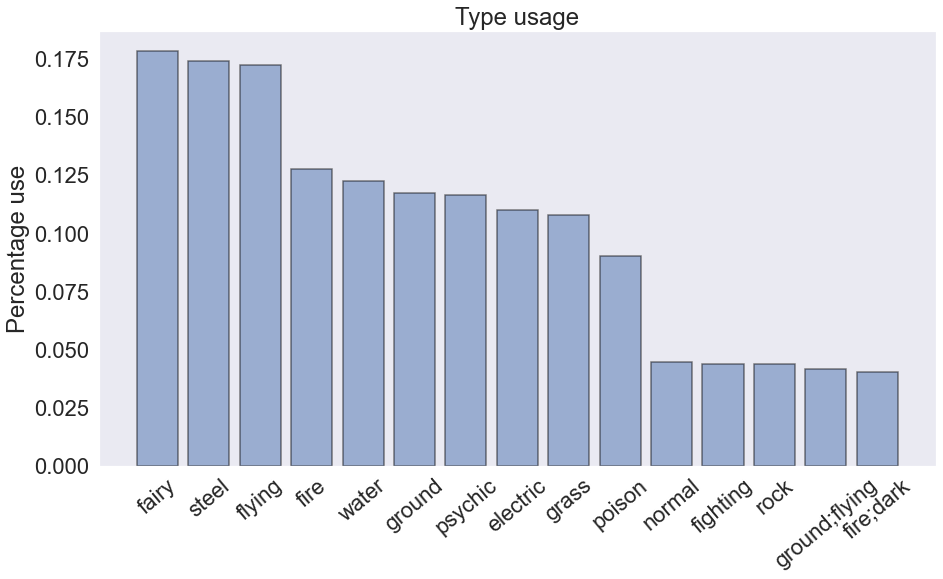

In [38]:
fig = plt.figure(figsize=(15,8))
ax= fig.add_subplot(111)
top_n = 15

ax.bar(type_df_combined.iloc[:top_n].index, type_df_combined.iloc[:top_n]['relative_perc'],alpha=0.5,
           edgecolor='black',linewidth=1.5)
ax.tick_params(axis='x', rotation=40)
ax.set_title("Type usage")
ax.set_ylabel("Percentage use")
ax.grid(b=None)
plt.grid(b=None)
plt.show()

We will now look at each of the types and look at their stats relative to their popularity. We will be creating 3 different plots to convey this information. Average stats are used over every pokemon inside of a category.

In [39]:
type_df

,relative_perc,defensive_str,defensive_weak,offensive_weak,offensive_str
fairy,0.178104,4,2,3,3
steel,0.174160,11,3,4,3
flying,0.172413,4,3,3,3
fire,0.127520,6,3,4,4
water,0.122454,4,2,3,3
ground,0.117324,3,3,3,5
psychic,0.116458,2,3,3,2
electric,0.110141,3,1,4,2
grass,0.107833,4,5,7,3
dark,0.106626,3,3,3,2


In [40]:
for type_ in type_df.index:
    for stat in ['Atk','Def','HP','SpA','SpD','Spe']:
        agg_df = pikalytics[pikalytics[type_]==1]
        type_df.loc[type_,stat] = agg_df[stat].mean() 

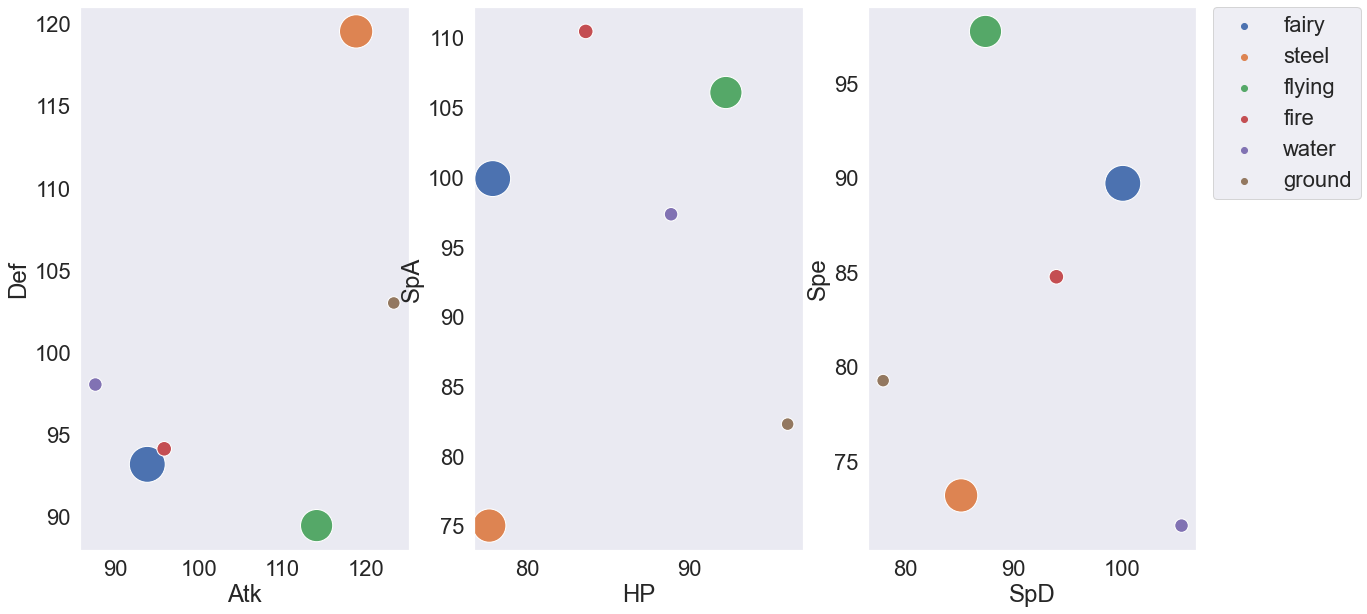

In [41]:
top_n = 6
sns.set_style({'axes.grid' : False})

fig, axs = plt.subplots(ncols=3, figsize=(20,10))
sns.scatterplot(data=type_df.iloc[:top_n], x='Atk', y='Def',
                 hue=type_df.iloc[:top_n].index,s=np.exp(type_df.iloc[:top_n]['relative_perc']*40)+50,ax=axs[0])

sns.scatterplot(data=type_df.iloc[:top_n], x='HP', y='SpA',
                 hue=type_df.iloc[:top_n].index,s=np.exp(type_df.iloc[:top_n]['relative_perc']*40)+50,ax=axs[1])

sns.scatterplot(data=type_df.iloc[:top_n], x='SpD', y='Spe',
                 hue=type_df.iloc[:top_n].index,s=np.exp(type_df.iloc[:top_n]['relative_perc']*40)+50,ax=axs[2])

axs[0].legend([],[], frameon=False)
axs[1].legend([],[], frameon=False)
axs[2].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

Here, we can see that the popular types are quite well distributed. Looking at the **steel** type, they have high values for Def and Atk, however, they have low values for all of the other stats. As for **fairy**, they have low values of Atk, Def and HP, with higher values of SpA, Spe and SpD

## Analysis of different abilities
Here we will split the the abilities into different abilities and multiply by the percentage use of the pokemon.

In [42]:
def split_abilities(row):
    abilities = row['abilities'][:-1].split(';')
    perc_use = row['perc_use']
    for abil in abilities:
        abil_name, abil_perc = abil.split(':')
        row[abil_name] = (float(abil_perc.replace('%',''))/100)*perc_use
    return row


In [43]:
ability_df = pikalytics.copy()[['abilities','perc_use']]
ability_df = ability_df[ability_df['abilities']!=0]
ability_df = ability_df.apply(split_abilities,axis=1).fillna(0)


In [44]:
ability_df = ability_df.drop(['abilities','perc_use'],axis=1).sum()

In [45]:
ability_df.sort_values(ascending=False,inplace=True)

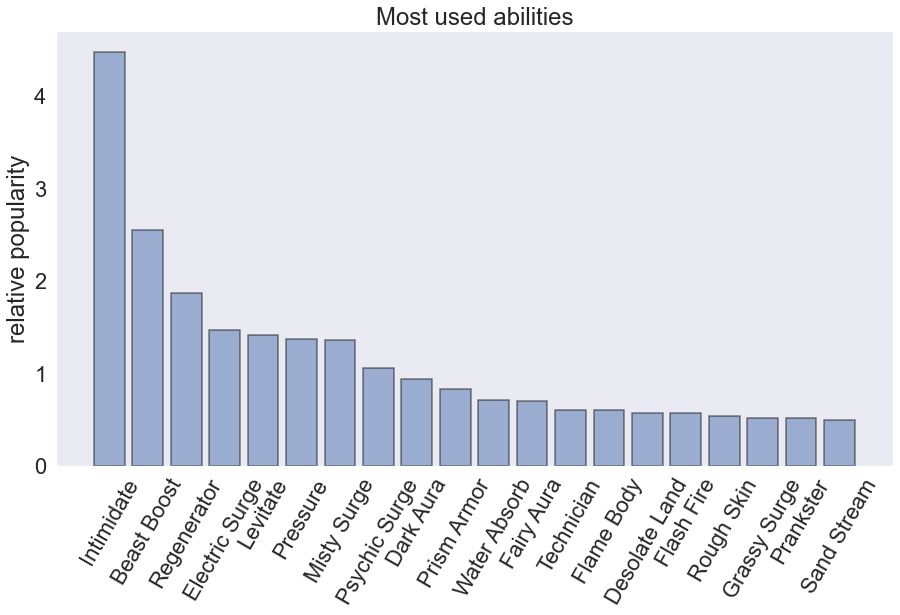

In [46]:
fig = plt.figure(figsize=(15,8))
ax= fig.add_subplot(111)
top_n = 20
ax.bar(ability_df.iloc[:top_n].index, ability_df.iloc[:top_n].values,alpha=0.5,
           edgecolor='black',linewidth=1.5)
ax.tick_params(axis='x', rotation=60)
ax.set_title("Most used abilities")
ax.set_ylabel("relative popularity")
ax.grid(b=None)
plt.grid(b=None)
plt.show()

## Analysis of different items


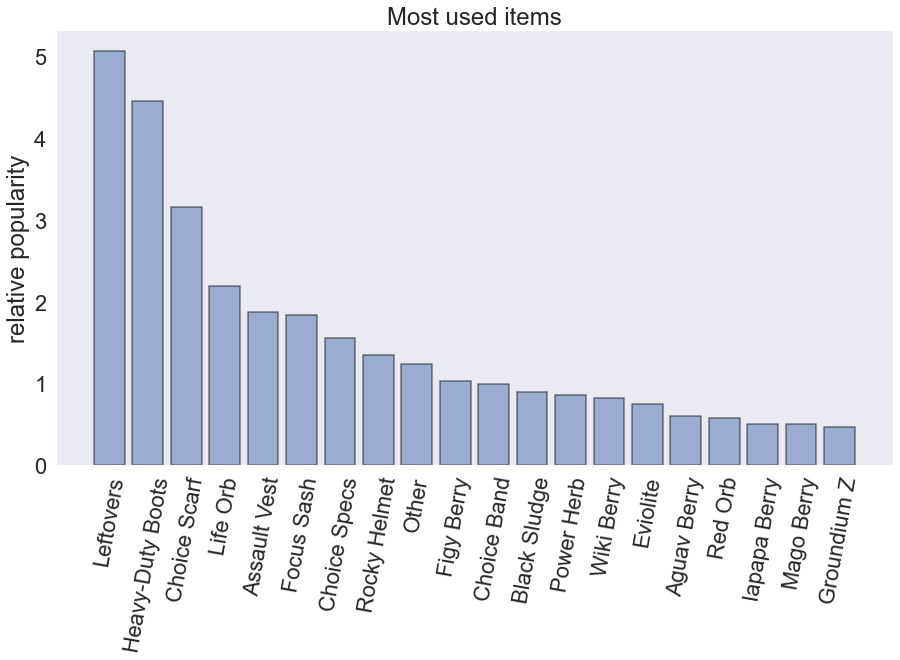

In [47]:
def split_items(row):
    items = row['items'][:-1].split(';')
    perc_use = row['perc_use']
    for item in items:
        item_name, item_perc = item.split(':')
        row[item_name] = (float(item_perc.replace('%',''))/100)*perc_use
    return row


item_df = pikalytics.copy()[['items','perc_use']]
item_df = item_df[item_df['items']!=0]
item_df = item_df.apply(split_items,axis=1).fillna(0)


item_df = item_df.drop(['items','perc_use'],axis=1).sum()

item_df.sort_values(ascending=False,inplace=True)

fig = plt.figure(figsize=(15,8))
ax= fig.add_subplot(111)
top_n = 20
ax.bar(item_df.iloc[:top_n].index, item_df.iloc[:top_n].values,alpha=0.5,
           edgecolor='black',linewidth=1.5)
ax.tick_params(axis='x', rotation=80)
ax.set_title("Most used items")
ax.set_ylabel("relative popularity")
ax.grid(b=None)
plt.grid(b=None)
plt.show()

## Popularity of each generation
The generation can be found from the url.

In [48]:
poke_data_meta['gen'] = poke_data_meta['txt_file'].apply(lambda x: x.split('/')[-1].replace('.txt','').split('-')[0])

In [49]:
gen_popularity = poke_data_meta.groupby(['gen']).agg('sum')
gen_popularity

,tot_battles,avg_weight_team
gen,,
gen5ou,328540,43.047
gen5ru,960,70.268
gen5ubers,22976,39.514
gen5uu,1544,49.769
gen7ou,257668760,56.435
gen7pu,2516168,12.349
gen7ru,3800856,26.074
gen7ubers,42915916,64.401
gen7uu,81782984,140.302


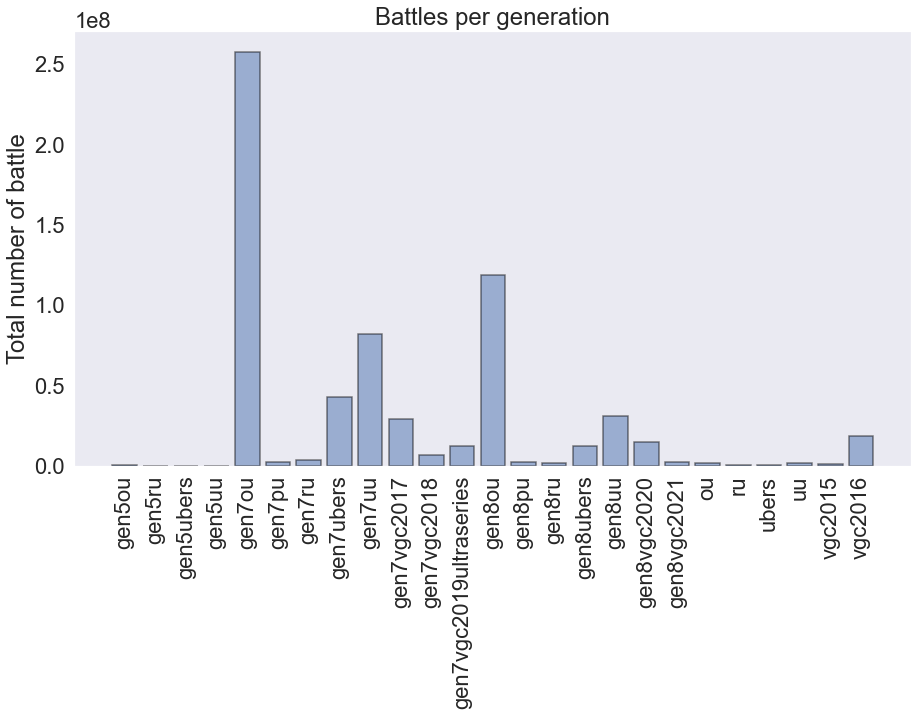

In [50]:
fig = plt.figure(figsize=(15,8))
ax= fig.add_subplot(111)
ax.bar(gen_popularity.index, gen_popularity.tot_battles,alpha=0.5,
           edgecolor='black',linewidth=1.5)
ax.tick_params(axis='x', rotation=90)
ax.set_title("Battles per generation")
ax.set_ylabel("Total number of battle")
ax.grid(b=None)
plt.grid(b=None)
plt.show()

## Most popular pokemon of each generation

In [51]:
most_popular_per_gen = {}
for gen in gen_popularity.index:
    temp_index = poke_data_meta.loc[poke_data_meta['gen'] == gen].index
    most_popular_per_gen[gen] = poke_data.loc[temp_index].sort_values('raw',ascending=False).iloc[0]['pokemon'].strip()

Here w created a dataframe with the most popular pokemon in each of the generations. This is done by taking the maximum raw number of times it was chosen for each of the generations.

In [52]:
pop_poke = pd.DataFrame(list(most_popular_per_gen.values()), columns=['Pokemon'], index=list(most_popular_per_gen.keys()))
pop_poke

,Pokemon
gen5ou,Starmie
gen5ru,Tyranitar
gen5ubers,Tyranitar
gen5uu,Scizor
gen7ou,Garchomp
gen7pu,Ferrothorn
gen7ru,Terrakion
gen7ubers,Tyranitar
gen7uu,Tyranitar
gen7vgc2017,Breloom


We can also calculate the number of times each of the pokemon is the most popular

In [53]:
pop_poke.groupby('Pokemon').agg({'Pokemon':'count'})

,Pokemon
Pokemon,
Arceus,1
Breloom,1
Conkeldurr,1
Ferrothorn,2
Garchomp,2
Infernape,1
Klink,1
Kyogre,1
Latios,2


Here we can see that **Tyranitar** is by far the most popular pokemon, being used the most in 5 out of the 25 generations